In [18]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [19]:
# Replace this broken code:
# df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-12-17')

# With this working solution:
import yfinance as yf

# Download the data and flatten the column structure
df = yf.download('AAPL', start='2012-01-01', end='2020-12-17')

# Check if columns are multi-level and flatten them
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Show the data
df

C:\Users\Arnav\AppData\Local\Temp\ipykernel_42652\4018487554.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2012-01-01', end='2020-12-17')
[*********************100%***********************]  1 of 1 completed



Price,Close,High,Low,Open,Volume
Date,,,,,
2012-01-03,12.345171,12.383297,12.278227,12.290235,302220800
2012-01-04,12.411516,12.448742,12.286633,12.308247,260022000
2012-01-05,12.549308,12.564918,12.388400,12.456846,271269600
2012-01-06,12.680496,12.691003,12.585032,12.601544,318292800
2012-01-09,12.660386,12.841107,12.648978,12.773563,394024400
...,...,...,...,...,...
2020-12-10,120.084557,120.698431,117.073677,117.414714,81312200
2020-12-11,119.275826,119.616863,117.463448,119.295310,86939800
2020-12-14,118.661934,120.191735,118.428081,119.460938,79184500


In [20]:
#Get the number or rows and columns in the data set
df.shape

(2255, 5)

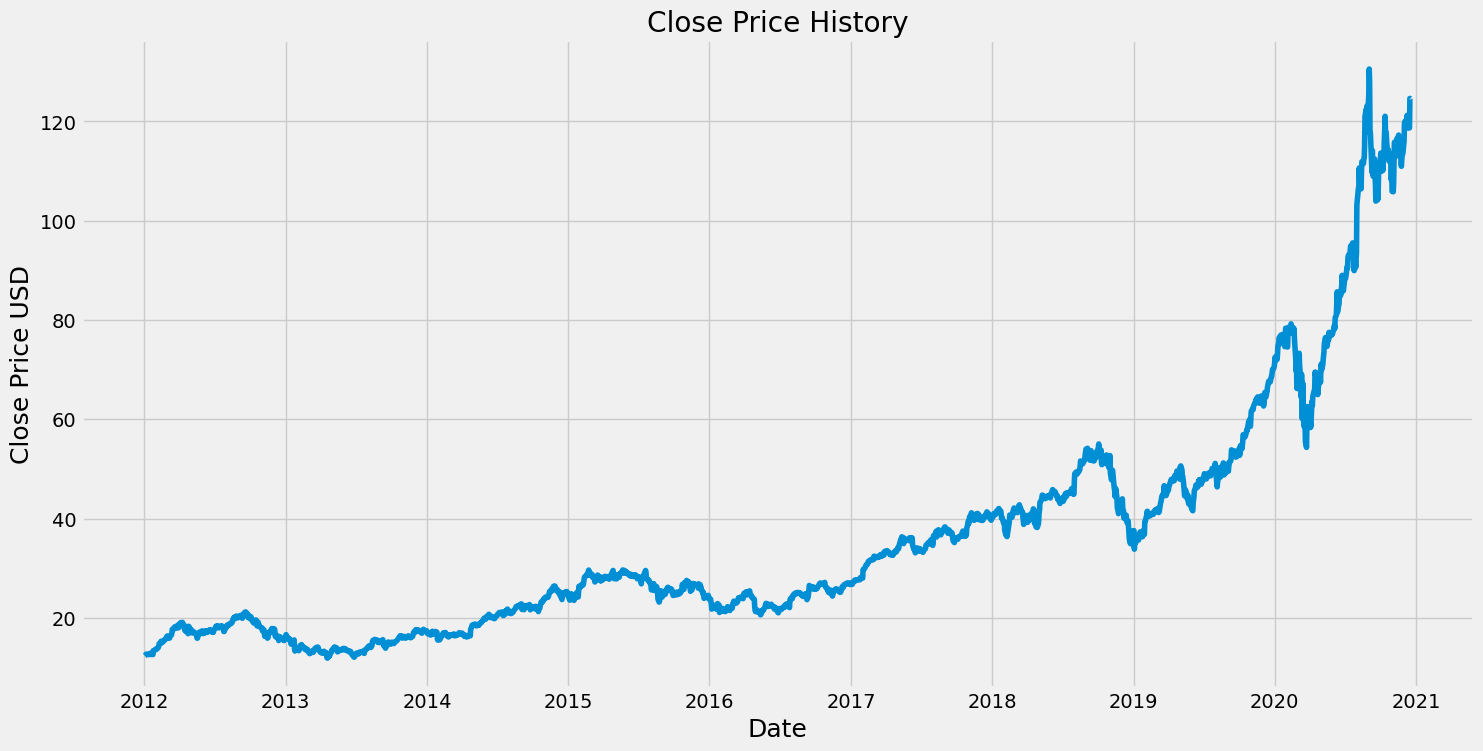

In [21]:
#visualise the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [22]:
# Create a new datafram with only the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1804

In [23]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0037798 ],
       [0.0043391 ],
       [0.00550069],
       ...,
       [0.9000415 ],
       [0.95014864],
       [0.94957359]])

In [24]:
# create the training dataset
# create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]

# split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Past 60 days
    y_train.append(train_data[i, 0])       # Next day's price
    if i<=61:
        print(x_train)
        print(y_train)
        print()



[array([0.0037798 , 0.0043391 , 0.00550069, 0.00660663, 0.0064371 ,
       0.00681922, 0.0066446 , 0.00635102, 0.00595117, 0.00718872,
       0.00830477, 0.0079606 , 0.00607519, 0.00787452, 0.00610303,
       0.01274619, 0.01223242, 0.01290308, 0.0143532 , 0.01523136,
       0.01515795, 0.01488717, 0.01604119, 0.01712685, 0.01835681,
       0.02034343, 0.02451662, 0.02457984, 0.02690307, 0.02863915,
       0.0256554 , 0.02680434, 0.02678161, 0.03000323, 0.02954517,
       0.03039296, 0.03191644, 0.03276417, 0.03520638, 0.03698553,
       0.03749925, 0.03767888, 0.034637  , 0.03390307, 0.0340119 ,
       0.0368716 , 0.03767641, 0.0394049 , 0.04347934, 0.0489153 ,
       0.047898  , 0.04790046, 0.05183077, 0.05306075, 0.052185  ,
       0.05138535, 0.05055272, 0.05331875, 0.0552169 , 0.05601153])]
[0.05404768605749041]

[array([0.0037798 , 0.0043391 , 0.00550069, 0.00660663, 0.0064371 ,
       0.00681922, 0.0066446 , 0.00635102, 0.00595117, 0.00718872,
       0.00830477, 0.0079606 , 0.00

In [25]:
# Convert the x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (1744, 60, 1)
y_train shape: (1744,)


In [26]:
# Build the LSTM model
from keras.layers import Input

model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))  # Explicit input layer
model.add(LSTM(50, return_sequences=True))     # No input_shape needed
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [27]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [40]:
# train the model
model.fit(x_train, y_train, epochs=1, batch_size=1)


1744/1744 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 4.7693e-05


In [41]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#create the datasets x_test and y_test
x_test = []
y_test = test_data[60:, 0]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# convert the data to a numpy array
x_test = np.array(x_test)

In [42]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [43]:
# get the model's predicted price values
predictions = model.predict(x_test)
# Without inverse transform: predictions = [0.78, 0.71, 0.83]
# With inverse transform: predictions = [152.40, 147.85, 159.20]
predictions = scaler.inverse_transform(predictions)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [44]:
# get the root mean squared error (RMSE) of the model's predictions
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse

74.63404901869183

C:\Users\Arnav\AppData\Local\Temp\ipykernel_42652\1132797169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


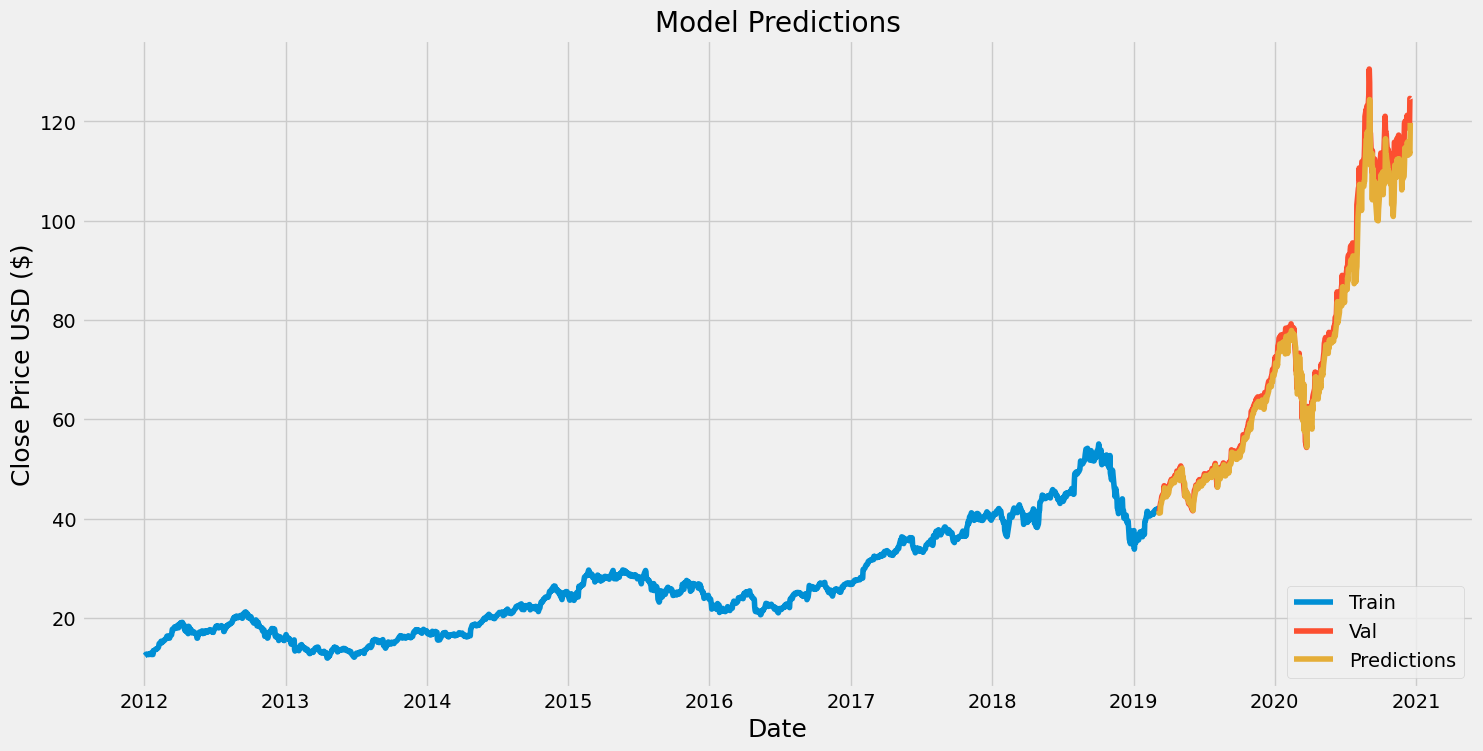

In [45]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model Predictions')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [46]:
# show the valid and predicted prices
valid

Price,Close,Predictions
Date,,
2019-03-07,41.220383,41.519981
2019-03-08,41.318363,41.078075
2019-03-11,42.749722,41.157188
2019-03-12,43.230022,42.434601
2019-03-13,43.421185,42.854973
...,...,...
2020-12-10,120.084557,113.155365
2020-12-11,119.275826,115.266289
2020-12-14,118.661934,113.754959


In [53]:
# get the quote 
# apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# Download the data and flatten the column structure
apple_quote = yf.download('AAPL', start='2012-01-01', end='2019-12-18')

# Check if columns are multi-level and flatten them
if isinstance(apple_quote.columns, pd.MultiIndex):
    apple_quote.columns = apple_quote.columns.get_level_values(0)
#create a new dataframe
apple_data = pd.DataFrame(apple_quote['Close'])
# apple_data
# get the last 60 days of data
apple_data = apple_data[-60:].values
# scale the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
apple_data = scaler.fit_transform(apple_data)
X_test = []
# append the last 60 days
X_test.append(apple_data)
# convert the X_test data to a numpy array
X_test = np.array(X_test)
# reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# get the predicted scaled price
predicted_price = model.predict(X_test)
# undo the scaling
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

C:\Users\Arnav\AppData\Local\Temp\ipykernel_42652\3648703250.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_quote = yf.download('AAPL', start='2012-01-01', end='2019-12-18')
[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[66.84486]]


In [55]:
apple_quote2 = yf.download('AAPL', start='2012-01-01', end='2019-12-19')
if isinstance(apple_quote2.columns, pd.MultiIndex):
    apple_quote2.columns = apple_quote2.columns.get_level_values(0)
#create a new dataframe
apple_data = pd.DataFrame(apple_quote2['Close'])
print(apple_quote2['Close'])

C:\Users\Arnav\AppData\Local\Temp\ipykernel_42652\1369719451.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_quote2 = yf.download('AAPL', start='2012-01-01', end='2019-12-19')
[*********************100%***********************]  1 of 1 completed

Date
2012-01-03    12.345174
2012-01-04    12.411516
2012-01-05    12.549310
2012-01-06    12.680498
2012-01-09    12.660381
                ...    
2019-12-12    65.561195
2019-12-13    66.452370
2019-12-16    67.589912
2019-12-17    67.722725
2019-12-18    67.560921
Name: Close, Length: 2004, dtype: float64
